# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
! pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
city_name = cities 
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

number = 1
temp  = []
humidity = []
cloudiness = []
windspeed = []
lat = []
lng = []
cities_data = []
country = []
dates = []
# Loop through the list of cities and perform a request for data on each

print('----------------------------------------------------------')
print('Start of Records')
print('----------------------------------------------------------')


for city in cities:
    response = requests.get(query_url + city).json()
    
    try: 
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cities_data.append(response['name'])
        country.append(response['sys']['country'])
        dates.append (response['dt'])
        print(f'City{number} of {len(cities)} complete || {city}')
        number = number + 1
              
    except KeyError:
        pass
        number = number + 1

----------------------------------------------------------
Start of Records
----------------------------------------------------------
City1 of 616 complete || bredasdorp
City2 of 616 complete || cape town
City3 of 616 complete || dikson
City4 of 616 complete || zhezkazgan
City5 of 616 complete || pandan
City7 of 616 complete || busselton
City9 of 616 complete || kahului
City10 of 616 complete || tasiilaq
City11 of 616 complete || punta arenas
City12 of 616 complete || cockburn town
City13 of 616 complete || ushuaia
City15 of 616 complete || mataura
City16 of 616 complete || airai
City17 of 616 complete || ponta do sol
City18 of 616 complete || adrar
City19 of 616 complete || kaeo
City21 of 616 complete || atuona
City22 of 616 complete || la asuncion
City24 of 616 complete || mataram
City25 of 616 complete || ilulissat
City26 of 616 complete || rikitea
City27 of 616 complete || vaini
City28 of 616 complete || east london
City29 of 616 complete || bluff
City31 of 616 complete || dalband

City249 of 616 complete || najran
City250 of 616 complete || cacador
City252 of 616 complete || faya
City253 of 616 complete || arroyo
City254 of 616 complete || mildura
City255 of 616 complete || palmer
City256 of 616 complete || odweyne
City257 of 616 complete || brae
City258 of 616 complete || borogontsy
City259 of 616 complete || norman wells
City260 of 616 complete || awbari
City261 of 616 complete || flin flon
City262 of 616 complete || thompson
City263 of 616 complete || quimper
City264 of 616 complete || sawtell
City265 of 616 complete || senigallia
City266 of 616 complete || pisco
City271 of 616 complete || pontes e lacerda
City272 of 616 complete || loa janan
City273 of 616 complete || kikwit
City274 of 616 complete || dickinson
City275 of 616 complete || hinckley
City276 of 616 complete || mar del plata
City277 of 616 complete || ziro
City278 of 616 complete || xixiang
City279 of 616 complete || evensk
City280 of 616 complete || faanui
City281 of 616 complete || baherden
Cit

City498 of 616 complete || nang rong
City499 of 616 complete || alyangula
City500 of 616 complete || gore
City501 of 616 complete || along
City502 of 616 complete || maloy
City503 of 616 complete || zyryanka
City504 of 616 complete || winnemucca
City505 of 616 complete || chapleau
City506 of 616 complete || pacific grove
City507 of 616 complete || ondangwa
City508 of 616 complete || nanyamba
City509 of 616 complete || perth
City510 of 616 complete || malkara
City511 of 616 complete || mabaruma
City512 of 616 complete || sand springs
City513 of 616 complete || angoche
City514 of 616 complete || piscu vechi
City515 of 616 complete || kruisfontein
City516 of 616 complete || california city
City517 of 616 complete || cauquenes
City518 of 616 complete || tavistock
City519 of 616 complete || bilma
City520 of 616 complete || firovo
City521 of 616 complete || omagari
City522 of 616 complete || mwanza
City523 of 616 complete || zlatoust
City524 of 616 complete || pandharpur
City525 of 616 compl

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
weather_df = pd.DataFrame({'City': cities_data, 
                             'Latitude': lat,
                            'Longitude': lng, 
                           'Temperature': temp, 
                           'Humidity': humidity,
                           'cloudiness': cloudiness,
                           'windspeed': windspeed, 
                          'Country': country, 
                          'Dates': dates})

weather_df. head()

,City,Latitude,Longitude,Temperature,Humidity,cloudiness,windspeed,Country,Dates
0,Bredasdorp,-34.5322,20.0403,41.00,93,0,2.30,ZA,1619829914
1,Cape Town,-33.9258,18.4232,56.73,82,0,9.22,ZA,1619829914
2,Dikson,73.5069,80.5464,16.39,96,99,7.61,RU,1619829915
3,Zhezkazgan,47.8043,67.7144,47.17,44,0,5.97,KZ,1619829915
4,Pandan,14.0453,124.1694,82.89,63,8,1.59,PH,1619829915


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
pd.DataFrame.to_csv(weather_df, 'weather_data.csv')

weather_df.head(5)

,City,Latitude,Longitude,Temperature,Humidity,cloudiness,windspeed,Country,Dates
0,Bredasdorp,-34.5322,20.0403,41.00,93,0,2.30,ZA,1619829914
1,Cape Town,-33.9258,18.4232,56.73,82,0,9.22,ZA,1619829914
2,Dikson,73.5069,80.5464,16.39,96,99,7.61,RU,1619829915
3,Zhezkazgan,47.8043,67.7144,47.17,44,0,5.97,KZ,1619829915
4,Pandan,14.0453,124.1694,82.89,63,8,1.59,PH,1619829915


In [11]:
weather_df.describe()

,Latitude,Longitude,Temperature,Humidity,cloudiness,windspeed,Dates
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.239198,16.439224,61.005316,69.784211,54.949123,7.811895,1.619830e+09
std,33.590925,89.560453,17.831978,22.065427,40.166865,5.470777,9.422566e+01
min,-54.800000,-175.200000,12.200000,1.000000,0.000000,0.130000,1.619830e+09
25%,-8.717250,-63.893625,47.327500,59.000000,13.000000,3.722500,1.619830e+09
50%,21.862600,20.453500,64.365000,74.000000,67.000000,6.820000,1.619830e+09
75%,48.004200,93.275000,76.630000,86.000000,98.750000,10.442500,1.619830e+09
max,78.218600,178.416700,92.210000,100.000000,100.000000,28.810000,1.619830e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

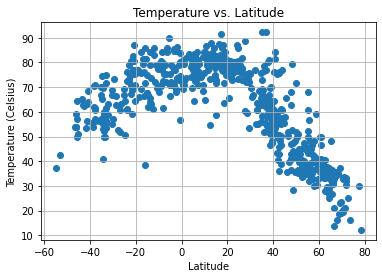

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature vs. Latitude")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

#save as image
plt.savefig("../Images/Temp_Lat")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

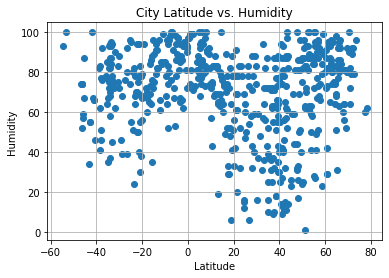

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#save as image
plt.savefig("../Images/Humidity_Lat")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

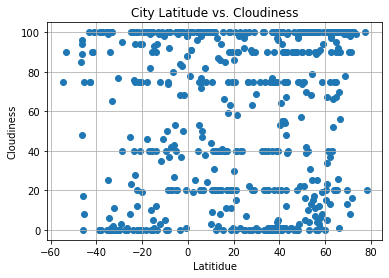

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitidue")
plt.grid(True)

#save as image
plt.savefig("../Images/cloudiness_Lat")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

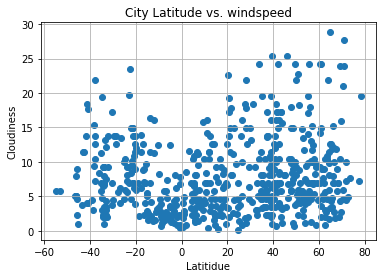

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. windspeed")
plt.ylabel("Cloudiness")
plt.xlabel("Latitidue")
plt.grid(True)

#save as image
plt.savefig("../Images/windspeed_Lat")

# Show plot
plt.show()

## Linear Regression

In [16]:
north_hemi = weather_df.loc[weather_df['Latitude']>=0]
south_hemi = weather_df.loc[weather_df['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y=-0.84x+89.92
The r-value is: 0.7688684397976255


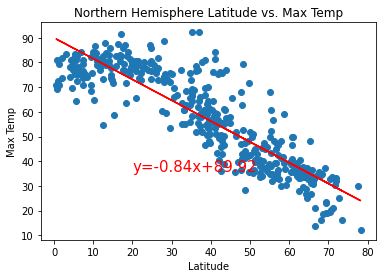

In [17]:
x_values=north_hemi["Latitude"]
y_values =north_hemi["Temperature"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title ("Northern Hemisphere Latitude vs. Max Temp")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")           
 
    #save as image
plt.savefig("../Images/Northern_lat_temp")
    
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y=0.53x+79.95
The r-value is: 0.45091994357149806


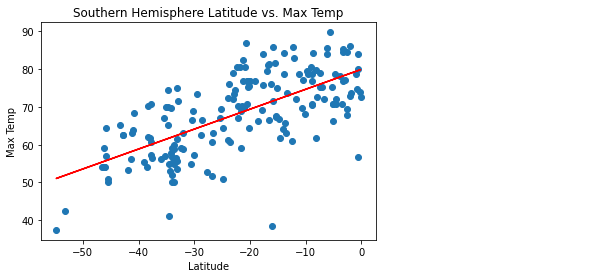

In [18]:
x_values=south_hemi["Latitude"]
y_values =south_hemi["Temperature"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title ("Southern Hemisphere Latitude vs. Max Temp")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")           


#save as image
plt.savefig("../Images/southern_lat_temp")


plt.show()

It appears that both the Northern and Southern Hemisphere has a strong correlation with temperature. The northern hemisphere has an r value of 0.76 and the southern hemisphere has an r value of 0.50 which are both relatively strong. Both show that the closer you are to 0 latitude (equator) the warmer the temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y=0.03x+66.34
The r-value is: 0.0005480172059543726


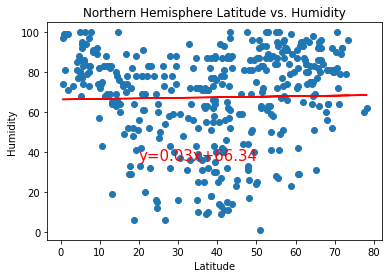

In [19]:
x_values=north_hemi["Latitude"]
y_values =north_hemi["Humidity"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title ("Northern Hemisphere Latitude vs. Humidity")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")           
 
    
#save as image
plt.savefig("../Images/northern_lat_humidity")    
    
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y=0.35x+82.78
The r-value is: 0.08131988720515947


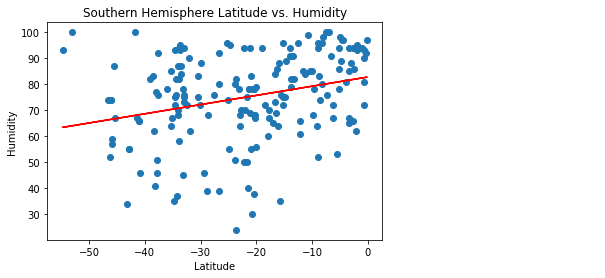

In [20]:
x_values=south_hemi["Latitude"]
y_values =south_hemi["Humidity"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title ("Southern Hemisphere Latitude vs. Humidity")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")           

#save as image
plt.savefig("../Images/southern_lat_humidity")


plt.show()

Both northern and southern hemisphere show very weak relationships between latitude and humidity with r values at 0.02 and 0.03.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y=0.15x+50.85
The r-value is: 0.005727428748007593


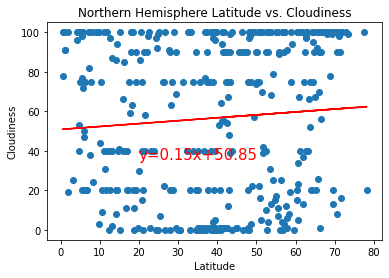

In [21]:
x_values=north_hemi["Latitude"]
y_values =north_hemi["cloudiness"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title ("Northern Hemisphere Latitude vs. Cloudiness")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")           
 
    
#save as image
plt.savefig("../Images/northern_lat_cloudiness")      
    
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y=0.21x+56.24
The r-value is: 0.004567730573776334


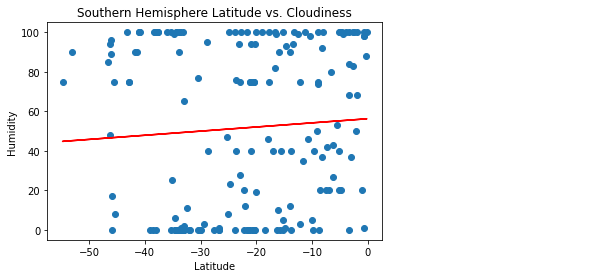

In [22]:
x_values=south_hemi["Latitude"]
y_values =south_hemi["cloudiness"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title ("Southern Hemisphere Latitude vs. Cloudiness")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")           

#save as image
plt.savefig("../Images/southern_lat_tcloudiness")


plt.show()

Latitude and cloudiness also show little to no relationship with very low r-values. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y=0.05x+6.1
The r-value is: 0.03749364748748766


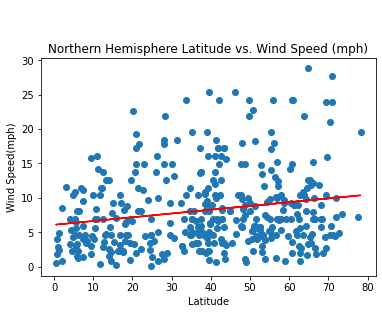

In [23]:
x_values=north_hemi["Latitude"]
y_values =north_hemi["windspeed"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title ("Northern Hemisphere Latitude vs. Wind Speed (mph)")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")           
 

    
#save as image
plt.savefig("../Images/northern_lat_windspeed")        
    

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y=-0.11x+4.66
The r-value is: 0.08720394306512755


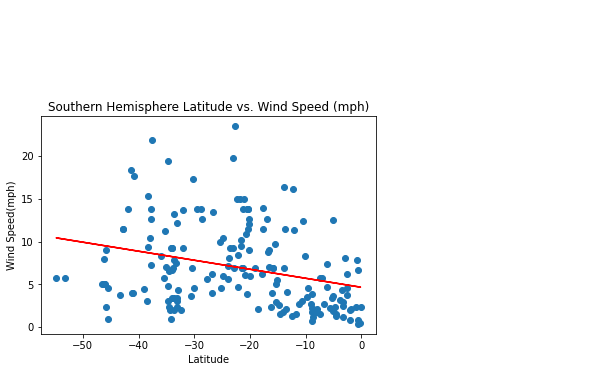

In [24]:
x_values=south_hemi["Latitude"]
y_values =south_hemi["windspeed"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values* slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title ("Southern Hemisphere Latitude vs. Wind Speed (mph)")

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")           

#save as image
plt.savefig("../Images/southern_lat_windspeed")


plt.show()

The northern hemisphere shows almost no relationship with latitude and windspeed and the southern hemisphere has an incredibly weak relationship.